## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Load and preprocess the dataset
* Seperate Data into Features and Labels and load them as a Pandas Dataframe
* Split the dataset into train and test sets
* Define the Preprocessing Method and Fit Training Data to it
* Make X_train to be the Scaled Version of Data.This process scales all the values in all 6 columns and replaces them with the new values.
* Apply the same normalization and scaling to test data.
* Convert from Pandas Dataframe to Numpy Arrays


In [2]:
boston = load_boston()

In [3]:
features_df = pd.DataFrame(np.array(boston.data), columns=[boston.feature_names])

In [4]:
features_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
labels_df = pd.DataFrame(np.array(boston.target), columns=['labels'])

In [6]:
labels_df.head()

,labels
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [7]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.2, random_state=101)

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [11]:
X_train = np.array(X_train)

In [12]:
y_train = np.array(y_train)

In [13]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [14]:
scal = StandardScaler()

In [15]:
scal.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
X_test = pd.DataFrame(data=scal.transform(X_test), columns=X_test.columns, index=X_test.index)

In [17]:
X_test = np.array(X_test)

In [18]:
y_test = np.array(y_test)

In [19]:
type(X_test), type(y_test)

(numpy.ndarray, numpy.ndarray)

In [20]:
features_df.columns

MultiIndex(levels=[['AGE', 'B', 'CHAS', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD', 'RM', 'TAX', 'ZN']],
           labels=[[3, 12, 5, 2, 7, 10, 0, 4, 9, 11, 8, 1, 6]])

## Building a linear regression model using tensorflow
* Make Feature Columns
* Define input function
* Define Linear Regressor Model with Adam as optimizer. Supported Optimizers: ('Adagrad', 'Adam', 'Ftrl', 'RMSProp', 'SGD')
* Set up Estimator Test Inputs
* Train the Linear Regressor Estimator

In [21]:
feat_cols = [tf.feature_column.numeric_column('x', shape=np.array(X_train).shape[1:])]

In [22]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':X_train}, y_train, batch_size=1, num_epochs=2000, shuffle=True)

In [23]:
linear_model = tf.estimator.LinearRegressor(feature_columns=feat_cols, optimizer='Adam')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/4x/nch36pvx5n7bgzg2stsyy98r0000gn/T/tmpwsnyaq2e', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a24017b70>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [24]:
train_input_func = tf.estimator.inputs.numpy_input_fn(X_train, y_train, batch_size=1, num_epochs=1000, shuffle=False)

In [25]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x': X_test}, y_test, batch_size=1, num_epochs=1, shuffle=False)

In [26]:
linear_model.train(input_fn=input_func, steps=2000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/4x/nch36pvx5n7bgzg2stsyy98r0000gn/T/tmpwsnyaq2e/model.ckpt.
INFO:tensorflow:loss = 171.61002, step = 1
INFO:tensorflow:global_step/sec: 655.966
INFO:tensorflow:loss = 0.90433246, step = 101 (0.154 sec)
INFO:tensorflow:global_step/sec: 610.949
INFO:tensorflow:loss = 86.585304, step = 201 (0.164 sec)
INFO:tensorflow:global_step/sec: 774.353
INFO:tensorflow:loss = 2.5316985, step = 301 (0.128 sec)
INFO:tensorflow:global_step/sec: 785.41
INFO:tensorflow:loss = 0.27511215, step = 401 (0.128 sec)
INFO:tensorflow:global_step/sec: 562.856
INFO:tensorflow:loss = 1.0511874, step = 501 (0.181 sec)
INFO:tensorflow:global_step/sec: 406.787
INFO:tensorflow:loss = 6.975394, step = 601 (0.241 sec)
INFO:tensorfl

## Evaluate the model
* Test the Model
* Get the predicted values
* Plot the results

In [27]:
test_metrics = linear_model.evaluate(input_fn=eval_input_func, steps=100)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-20-06:41:46
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/4x/nch36pvx5n7bgzg2stsyy98r0000gn/T/tmpwsnyaq2e/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [10/100]
INFO:tensorflow:Evaluation [20/100]
INFO:tensorflow:Evaluation [30/100]
INFO:tensorflow:Evaluation [40/100]
INFO:tensorflow:Evaluation [50/100]
INFO:tensorflow:Evaluation [60/100]
INFO:tensorflow:Evaluation [70/100]
INFO:tensorflow:Evaluation [80/100]
INFO:tensorflow:Evaluation [90/100]
INFO:tensorflow:Evaluation [100/100]
INFO:tensorflow:Finished evaluation at 2018-06-20-06:41:47
INFO:tensorflow:Saving dict for global step 2000: average_loss = 51.105473, global_step = 2000, loss = 51.105473


In [28]:
list(linear_model.predict(input_fn=eval_input_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/4x/nch36pvx5n7bgzg2stsyy98r0000gn/T/tmpwsnyaq2e/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([34.44175], dtype=float32)},
 {'predictions': array([25.749916], dtype=float32)},
 {'predictions': array([18.918428], dtype=float32)},
 {'predictions': array([18.711954], dtype=float32)},
 {'predictions': array([25.049166], dtype=float32)},
 {'predictions': array([29.374733], dtype=float32)},
 {'predictions': array([39.4187], dtype=float32)},
 {'predictions': array([9.717651], dtype=float32)},
 {'predictions': array([33.98502], dtype=float32)},
 {'predictions': array([14.255391], dtype=float32)},
 {'predictions': array([22.94392], dtype=float32)},
 {'predictions': array([16.012627], dtype=float32)},
 {'predictions': array([14.417982], dtype=float32)},
 {'predictions': array([10.358976], dtype=float32)},
 {'predictions': array([24.784624], dtype=float32)},
 {'predictions': array([21.733578], dtype=float32)},
 {'predictions': array([11.357845], dtype=float32)},
 {'predictions': array([27.177418], dtype=float32)},
 {'predictions': array([26.492807], dtype=float32)},

In [29]:
predictions = linear_model.predict(input_fn=eval_input_func)

In [30]:
pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/4x/nch36pvx5n7bgzg2stsyy98r0000gn/T/tmpwsnyaq2e/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [31]:
predicted_vals = []

In [32]:
for pred in linear_model.predict(input_fn=eval_input_func):
    predicted_vals.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/4x/nch36pvx5n7bgzg2stsyy98r0000gn/T/tmpwsnyaq2e/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


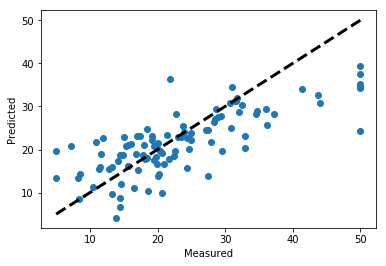

In [33]:
fig, ax = plt.subplots()
ax.scatter(y_test, predicted_vals)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()